In [1]:
# Projeto: Pesquisa e Experimentação em Sistemas de Informação-Grupo 1 - notebook_titanicsurvivalprediction

import numpy as np # Manipulação de matrizes
import pandas as pd # Criação e manipulação de dataset
from pandas import *
import matplotlib.pyplot as plt # Plotagem de dados
import matplotlib.font_manager
%matplotlib inline
import seaborn as sns # Plotagem e visualização dos dados
from tabulate import tabulate
from scipy.stats import chi2_contingency
import warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset-g1/Titanic-Dataset.csv


In [2]:
# Criando dataset
df = pd.read_csv("/kaggle/input/dataset-g1/Titanic-Dataset.csv")

In [3]:
# Visualização inicial do dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Número de linhas do Data Frame
df.shape

(891, 12)

In [5]:
# Colunas presentes no Data Frame
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Informações sobre o conjunto de dados
print("\nInformações sobre o conjunto de dados:")
print(df.info())


Informações sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
# Avaliando a existência de dados nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Avaliando valores nulos
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
# Calculando a porcentagem de valores não nulos em cada coluna
total_rows = len(df)
percentages = (df.count() / total_rows) * 100

# Mostrando os valores em porcentagem
print("\nPorcentagem de valores não nulos em cada coluna:")
print(percentages) 


Porcentagem de valores não nulos em cada coluna:
PassengerId    100.000000
Survived       100.000000
Pclass         100.000000
Name           100.000000
Sex            100.000000
Age             80.134680
SibSp          100.000000
Parch          100.000000
Ticket         100.000000
Fare           100.000000
Cabin           22.895623
Embarked        99.775533
dtype: float64


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

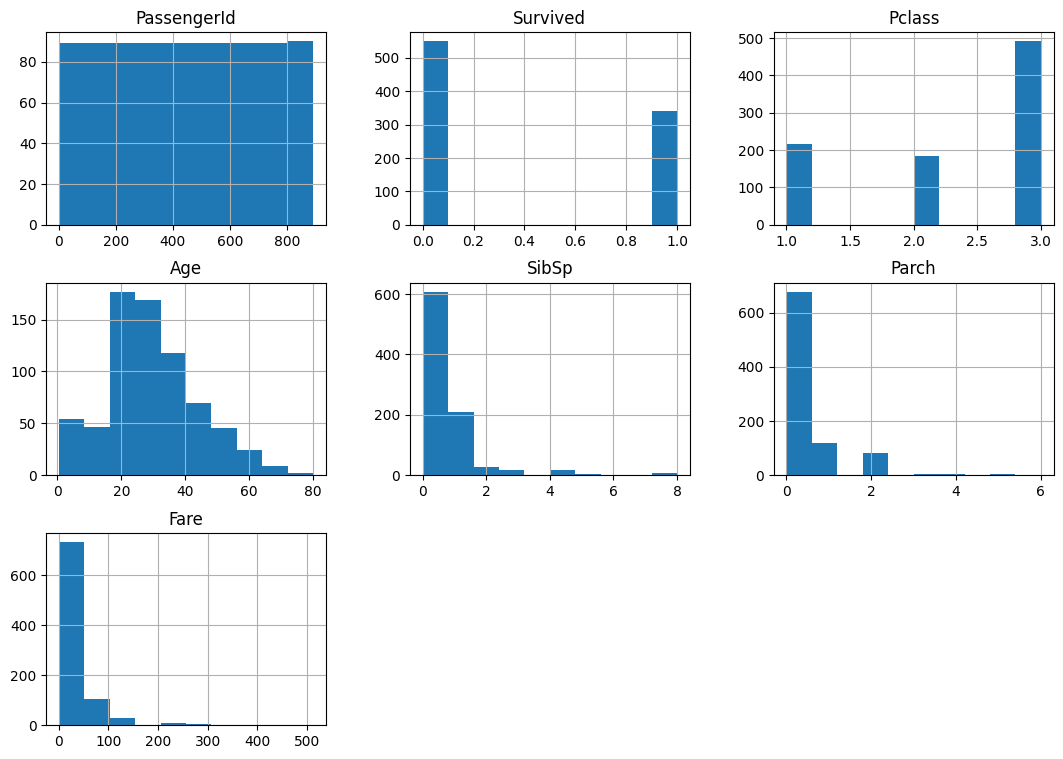

In [10]:
#histograma das variáveis numéricas
df.hist(figsize=(13,9))

In [11]:
#definindo os dados que aparecerão no gráfico

labels = ['Não Sobreviventes', "Sobreviventes"] 

contagem = pd.cut(x=df.Survived, bins=2,labels= labels, include_lowest=True).value_counts() #nº de sobreviventes

taxa_de_sobreviventes = (pd.value_counts(pd.cut(x=df.Survived, bins=2,labels= labels, 
                                                include_lowest=True),normalize=True) * 100).round(1) #taxa de Sobreviventes
quant_sobrevi = pd.DataFrame({"Contagem":contagem, 
                              'Taxa de Sobrevivência(%)':taxa_de_sobreviventes}) #criando um DataFrame para facilitar a visualização dos dados
                              
quant_sobrevi

/tmp/ipykernel_18/801052104.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  taxa_de_sobreviventes = (pd.value_counts(pd.cut(x=df.Survived, bins=2,labels= labels,


,Contagem,Taxa de Sobrevivência(%)
Survived,,
Não Sobreviventes,549,61.6
Sobreviventes,342,38.4


Text(0.5, 1.0, 'Taxa de Sobreviventes do Titanic')

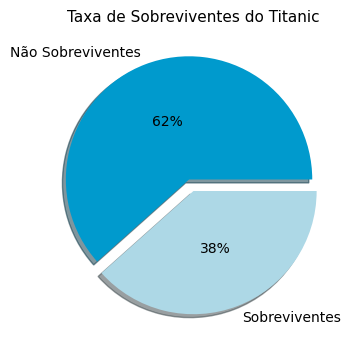

In [12]:
plt.figure(figsize=(6, 4))

cores= ['#009ACD', '#ADD8E6']
percentages = list(quant_sobrevi['Taxa de Sobrevivência(%)'])
explode=(0.1,0)

plt.pie(percentages, explode=explode, 
       labels=labels,
       colors = cores,
       autopct='%1.0f%%',
       shadow=True, startangle=0,   
       pctdistance=0.5,labeldistance=1.1)
plt.title("Taxa de Sobreviventes do Titanic", fontsize=11, pad=11)

In [13]:
# Calcular o percentual de Passageiros a Bordo por Sexo
percentual_por_sexo_passageiros = df['Sex'].value_counts(normalize=True) * 100

# Calcular o número de Sobreviventes por Sexo e a taxa de sobreviventes por sexo
sobreviventes_por_sexo = df.groupby('Sex')['Survived'].agg(['sum', 'mean'])
sobreviventes_por_sexo.columns = ['Nº Sobreviventes', 'Taxa de Sobrevivência (%)']

# Criar DataFrame com as informações
tabela_informacoes = pd.DataFrame({
    'Sexo': percentual_por_sexo_passageiros.index,
    'Sexo (%)': percentual_por_sexo_passageiros.values,
    'Nº Sobreviventes': sobreviventes_por_sexo['Nº Sobreviventes'],
    'Taxa de Sobrevivência (%)': sobreviventes_por_sexo['Taxa de Sobrevivência (%)']
})

# Adicionar coluna de somatória de pessoas por sexo
tabela_informacoes['Total por Sexo'] = df['Sex'].value_counts()

# Ordenar o DataFrame pelo sexo masculino primeiro
tabela_informacoes = tabela_informacoes.sort_values(by='Sexo')

# Imprimir a tabela formatada
print(tabulate(tabela_informacoes, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════╤════════════╤════════════════════╤═════════════════════════════╤══════════════════╕
│ Sexo   │   Sexo (%) │   Nº Sobreviventes │   Taxa de Sobrevivência (%) │   Total por Sexo │
╞════════╪════════════╪════════════════════╪═════════════════════════════╪══════════════════╡
│ female │    35.2413 │                109 │                    0.188908 │              577 │
├────────┼────────────┼────────────────────┼─────────────────────────────┼──────────────────┤
│ male   │    64.7587 │                233 │                    0.742038 │              314 │
╘════════╧════════════╧════════════════════╧═════════════════════════════╧══════════════════╛


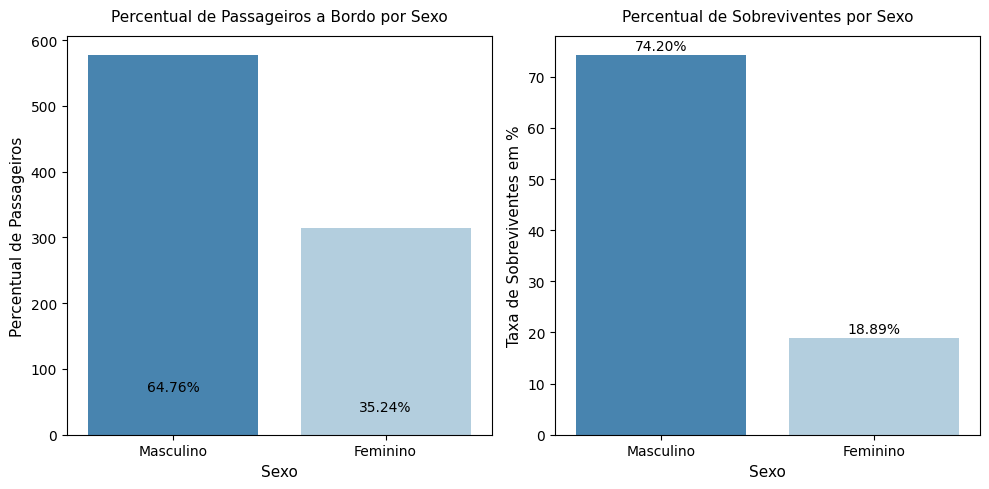

In [14]:
# Calcular o percentual de Passageiros a Bordo por Sexo
percentual_por_sexo = df['Sex'].value_counts(normalize=True) * 100
# Gráfico: Percentual de Passageiros a Bordo por Sexo
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Sex', palette='Blues_r')
plt.title('Percentual de Passageiros a Bordo por Sexo', fontsize=11, pad=11)
plt.xlabel('Sexo', fontsize=11)
plt.ylabel('Percentual de Passageiros', fontsize=11)
plt.xticks(ticks=[0, 1], labels=['Masculino', 'Feminino'])  # Definindo os rótulos do eixo x
# Adicionar texto com os percentuais no gráfico
for i, percentual in enumerate(percentual_por_sexo):
    plt.text(i, percentual + 1, f'{percentual:.2f}%', ha='center')

# Calcular o percentual de Sobreviventes por Sexo
percentual_por_sexo = df.groupby('Sex')['Survived'].mean() * 100
# Criar um DataFrame com os dados
quant_sex = pd.DataFrame({'Sexo': percentual_por_sexo.index, 'Taxa de Sobreviventes por Sexo em %': percentual_por_sexo.values})
# Gráfico: Percentual de Sobreviventes por Sexo
plt.subplot(1, 2, 2)
ax = sns.barplot(x='Sexo', y='Taxa de Sobreviventes por Sexo em %', data=quant_sex, palette='Blues_r')
ax.set_title("Percentual de Sobreviventes por Sexo", fontsize=11, pad=11)
ax.set_xlabel('Sexo', fontsize=11)
ax.set_ylabel('Taxa de Sobreviventes em %', fontsize=11)
ax.set_xticklabels(labels=['Masculino', 'Feminino'])
plt.tight_layout()

# Adicionar texto com os percentuais no gráfico
for i, percentual in enumerate(percentual_por_sexo):
    plt.text(i, percentual + 1, f'{percentual:.2f}%', ha='center')

plt.show()

In [15]:
# Sobreviventes por idade
pd.DataFrame(df.Age.describe())

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [16]:
def generate_age_survival_table(df):
    # Vamos primeiro lidar com os dados ausentes na coluna 'Age'
    # Preencher os valores ausentes na coluna 'Age' com a mediana da idade
    df['Age'] = df['Age'].fillna(df['Age'].median())

    # Criar faixas de idade
    age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

    # Categorizar as idades
    df['Faixa Etária'] = pd.cut(df['Age'], bins=age_bins, labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

    # Calcular o percentual de Passageiros a Bordo por Idade
    percentual_por_idade = df['Faixa Etária'].value_counts(normalize=True) * 100

    # Calcular o número de Sobreviventes por Idade e a taxa de sobreviventes por idade
    sobreviventes_por_idade = df.groupby('Faixa Etária')['Survived'].agg(['sum', 'mean'])
    sobreviventes_por_idade.columns = ['Nº Sobreviventes por Idade', 'Taxa de Sobrevivência por Idade (%)']

    # Criar DataFrame com as informações de Idade
    quant_idade = pd.DataFrame({
        'Faixa Etária': percentual_por_idade.index,
        '% de passageiros por Faixa Etária': percentual_por_idade.values,
        'Nº Sobreviventes por Faixa Etária': sobreviventes_por_idade['Nº Sobreviventes por Idade'],
        'Taxa de Sobreviventes por Faixa Etária em %': sobreviventes_por_idade['Taxa de Sobrevivência por Idade (%)']
    })

    # Redefinir o índice para evitar ambiguidade
    quant_idade = quant_idade.reset_index(drop=True)

    # Ordenar o DataFrame pelas faixas de idade
    quant_idade = quant_idade.sort_values(by='Faixa Etária')

    # Exibir a tabela usando tabulate
    print(tabulate(quant_idade, headers='keys', tablefmt='fancy_grid', showindex=False))

# Exemplo de uso
generate_age_survival_table(df)

╒════════════════╤═════════════════════════════════════╤═════════════════════════════════════╤═══════════════════════════════════════════════╕
│ Faixa Etária   │   % de passageiros por Faixa Etária │   Nº Sobreviventes por Faixa Etária │   Taxa de Sobreviventes por Faixa Etária em % │
╞════════════════╪═════════════════════════════════════╪═════════════════════════════════════╪═══════════════════════════════════════════════╡
│ 0-10           │                            7.18294  │                                  33 │                                      0.383721 │
├────────────────┼─────────────────────────────────────┼─────────────────────────────────────┼───────────────────────────────────────────────┤
│ 11-20          │                           12.9068   │                                 136 │                                      0.334152 │
├────────────────┼─────────────────────────────────────┼─────────────────────────────────────┼───────────────────────────────────────────────┤

/tmp/ipykernel_18/4140478571.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sobreviventes_por_idade = df.groupby('Faixa Etária')['Survived'].agg(['sum', 'mean'])


/tmp/ipykernel_18/3761557833.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sobreviventes_por_idade = df.groupby('Faixa Etária')['Survived'].agg(['sum', 'mean'])
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this wa

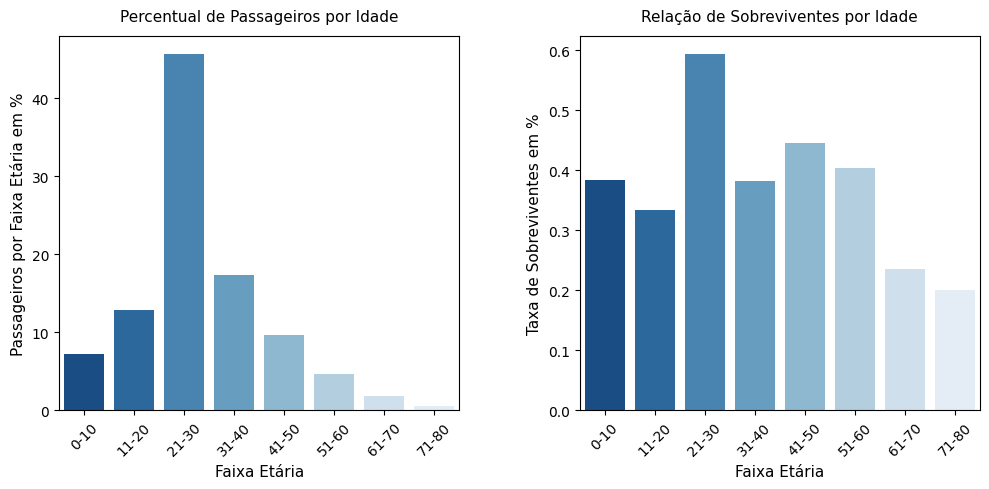

In [17]:
def plot_age_survival(df, color_palette='Greys'):
    # Vamos primeiro lidar com os dados ausentes na coluna 'Age'
    # Preencher os valores ausentes na coluna 'Age' com a mediana da idade
    df['Age'] = df['Age'].fillna(df['Age'].median())

    # Criar faixas de idade
    age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

    # Categorizar as idades
    df['Faixa Etária'] = pd.cut(df['Age'], bins=age_bins, labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

    # Calcular o percentual de Passageiros a Bordo por Idade
    percentual_por_idade = df['Faixa Etária'].value_counts(normalize=True) * 100

    # Calcular o número de Sobreviventes por Idade e a taxa de sobreviventes por idade
    sobreviventes_por_idade = df.groupby('Faixa Etária')['Survived'].agg(['sum', 'mean'])
    sobreviventes_por_idade.columns = ['Nº Sobreviventes por Idade', 'Taxa de Sobrevivência por Idade (%)']

    # Criar DataFrame com as informações de Idade
    quant_idade = pd.DataFrame({
        'Faixa Etária': percentual_por_idade.index,
        '% de passageiros por Faixa Etária': percentual_por_idade.values,
        'Taxa de Sobreviventes por Faixa Etária em %': sobreviventes_por_idade['Taxa de Sobrevivência por Idade (%)']
    })

    # Redefinir o índice para evitar ambiguidade
    quant_idade = quant_idade.reset_index(drop=True)

    # Ordenar o DataFrame pelas faixas de idade
    quant_idade = quant_idade.sort_values(by='Faixa Etária')

    # Criar os subplots
    fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

    # Gráfico: Percentual de Passageiros por Idade
    sns.barplot(x='Faixa Etária', y='% de passageiros por Faixa Etária', data=quant_idade,
                ax=axis1, palette=color_palette)
    axis1.set_xlabel('Faixa Etária', fontsize=11)
    axis1.set_ylabel('Passageiros por Faixa Etária em %', fontsize=11)
    axis1.set_title('Percentual de Passageiros por Idade', fontsize=11, pad=11)
    axis1.set_xticklabels(axis1.get_xticklabels(), rotation=45)

    # Gráfico: Relação de Sobreviventes por Idade
    sns.barplot(x='Faixa Etária', y='Taxa de Sobreviventes por Faixa Etária em %', data=quant_idade,
                ax=axis2, palette=color_palette)
    axis2.set_xlabel('Faixa Etária', fontsize=11)
    axis2.set_ylabel('Taxa de Sobreviventes em %', fontsize=11)
    axis2.set_title('Relação de Sobreviventes por Idade', fontsize=11, pad=11)
    axis2.set_xticklabels(axis2.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3)  # Ajuste a largura entre os subplots
    plt.show()

# Exemplo de uso com mudança de cores
plot_age_survival(df, color_palette='Blues_r')

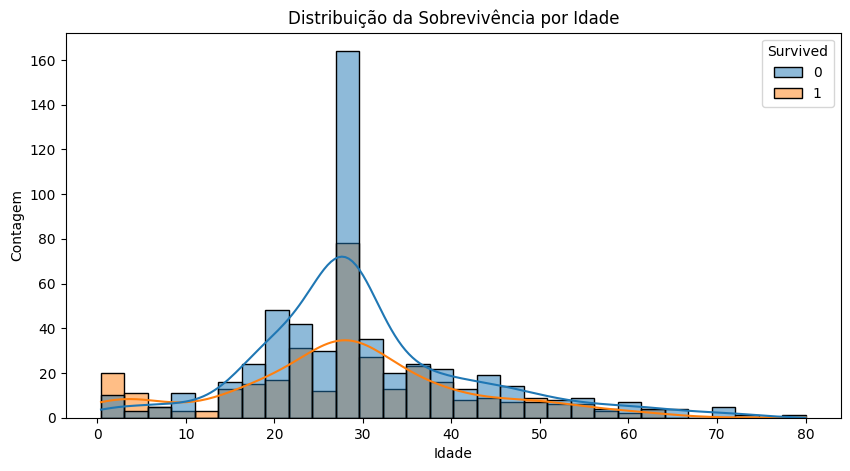

In [18]:
# Desative os avisos temporariamente
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Gráfico: Distribuição da sobrevivência por idade
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Distribuição da Sobrevivência por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

In [19]:
# Calcular o percentual de Passageiros a Bordo por Classe
percentual_por_classe = df['Pclass'].value_counts(normalize=True) * 100

# Calcular o número de Sobreviventes por Classe e a taxa de sobreviventes por classe
sobreviventes_por_classe = df.groupby('Pclass')['Survived'].agg(['sum', 'mean'])
sobreviventes_por_classe.columns = ['Nº Sobreviventes por Classe', 'Taxa de Sobrevivência por Classe (%)']

# Formatar a coluna 'Taxa de Sobreviventes por Classe (%)' para duas casas decimais
sobreviventes_por_classe['Taxa de Sobrevivência por Classe (%)'] = sobreviventes_por_classe['Taxa de Sobrevivência por Classe (%)']

# Criar DataFrame com as informações da classe
tabela_classe = pd.DataFrame({
    'Classe (Pclass)': percentual_por_classe.index,
    '% de Passageiros por Classe': percentual_por_classe.values,
    'Nº de Sobreviventes por Classe': sobreviventes_por_classe['Nº Sobreviventes por Classe'],
    'Taxa de Sobreviventes por Classe (%)': sobreviventes_por_classe['Taxa de Sobrevivência por Classe (%)']
})

# Ordenar o DataFrame pelas classes
tabela_classe = tabela_classe.sort_values(by='Classe (Pclass)')

# Exibir a tabela formatada
print(tabulate(tabela_classe, headers='keys', tablefmt='fancy_grid', showindex=False))


╒═══════════════════╤═══════════════════════════════╤══════════════════════════════════╤════════════════════════════════════════╕
│   Classe (Pclass) │   % de Passageiros por Classe │   Nº de Sobreviventes por Classe │   Taxa de Sobreviventes por Classe (%) │
╞═══════════════════╪═══════════════════════════════╪══════════════════════════════════╪════════════════════════════════════════╡
│                 1 │                       24.2424 │                               87 │                               0.472826 │
├───────────────────┼───────────────────────────────┼──────────────────────────────────┼────────────────────────────────────────┤
│                 2 │                       20.651  │                              119 │                               0.242363 │
├───────────────────┼───────────────────────────────┼──────────────────────────────────┼────────────────────────────────────────┤
│                 3 │                       55.1066 │                              136 │  

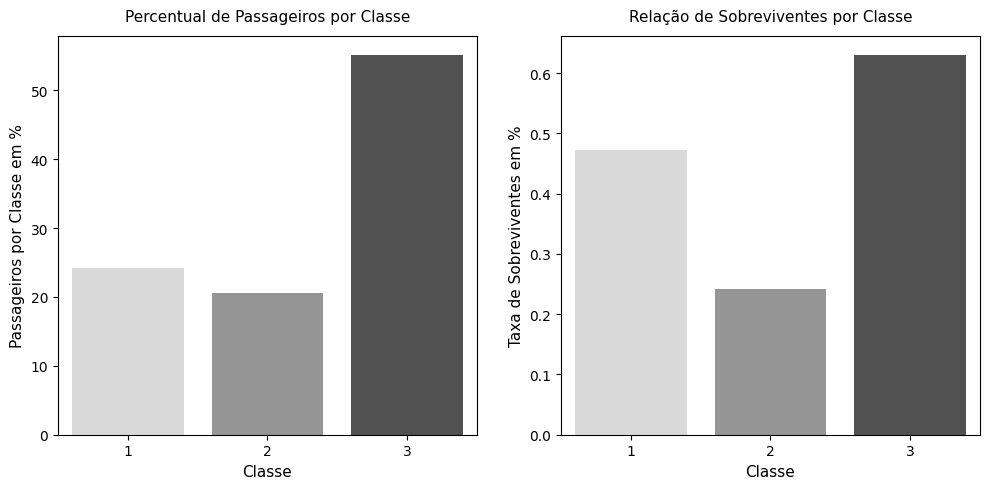

In [20]:
# Calcular o percentual de Passageiros a Bordo por Classe
percentual_por_classe = df['Pclass'].value_counts(normalize=True) * 100

# Calcular o número de Sobreviventes por Classe e a taxa de sobreviventes por classe
sobreviventes_por_classe = df.groupby('Pclass')['Survived'].agg(['sum', 'mean'])
sobreviventes_por_classe.columns = ['Nº Sobreviventes por Classe', 'Taxa de Sobrevivência por Classe (%)']

# Criar DataFrame com as informações da classe
quant_class = pd.DataFrame({
    'Classe': percentual_por_classe.index,
    '% de passageiros por Classe': percentual_por_classe.values,
    'Taxa de Sobreviventes por Classe em %': sobreviventes_por_classe['Taxa de Sobrevivência por Classe (%)']
})

# Ordenar o DataFrame pelas classes
quant_class = quant_class.sort_values(by='Classe')

# Criar os subplots
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

# Lista de cores para escolher
cores = ['Greys', 'Blues', 'Reds', 'Greens', 'Oranges', 'Purples']

# Gráfico: Percentual de Passageiros por Classe
sns.barplot(x='Classe', y='% de passageiros por Classe', data=quant_class,
            ax=axis1, palette=cores[0])
axis1.set_xlabel('Classe', fontsize=11)
axis1.set_ylabel('Passageiros por Classe em %', fontsize=11)
axis1.set_title('Percentual de Passageiros por Classe', fontsize=11, pad=11)

# Gráfico: Relação de Sobreviventes por Classe
sns.barplot(x='Classe', y='Taxa de Sobreviventes por Classe em %', data=quant_class,
            ax=axis2, palette=cores[0])
axis2.set_xlabel('Classe', fontsize=11)
axis2.set_ylabel('Taxa de Sobreviventes em %', fontsize=11)
axis2.set_title('Relação de Sobreviventes por Classe', fontsize=11, pad=11)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)  # Ajuste a largura entre os subplots
plt.show()


In [21]:
import pandas as pd
from tabulate import tabulate

def generate_sibsp_table(df, column_width=10):
    # Calcular o percentual de Passageiros a Bordo por Dependentes-Irmãos/Cônjuge (SibSp)
    percentual_por_sibsp = df['SibSp'].value_counts(normalize=True) * 100

    # Calcular o número de Sobreviventes por Dependentes-Irmãos/Cônjuge (SibSp) e a taxa de sobreviventes por essa categoria
    sobreviventes_por_sibsp = df.groupby('SibSp')['Survived'].agg(['sum', 'mean'])
    sobreviventes_por_sibsp.columns = ['Sobreviventes', 'Taxa (%)']

    # Criar DataFrame com as informações de Dependentes-Irmãos/Cônjuge (SibSp)
    quant_sibsp = pd.DataFrame({
        'Dep-Irmãos/Côn': percentual_por_sibsp.index,
        '% de passageiros': percentual_por_sibsp.values,
        'Sobreviventes': sobreviventes_por_sibsp['Sobreviventes'],
        'Taxa de Sobrevivência (%)': sobreviventes_por_sibsp['Taxa (%)']
    })

    # Ordenar o DataFrame pelos valores de SibSp
    quant_sibsp = quant_sibsp.sort_values(by='Dep-Irmãos/Côn')

    # Estilo da tabela
    style = quant_sibsp.style.set_table_styles([{'selector': 'th', 'props': [('max-width', f'{column_width}px')]}])

    # Exibir a tabela usando tabulate
    print(tabulate(quant_sibsp, headers='keys', tablefmt='pipe', showindex=True, numalign="center"))

# Exemplo de uso
generate_sibsp_table(df, column_width=10)


|  SibSp  |  Dep-Irmãos/Côn  |  % de passageiros  |  Sobreviventes  |  Taxa de Sobrevivência (%)  |
|:-------:|:----------------:|:------------------:|:---------------:|:---------------------------:|
|    0    |        0         |      68.2379       |       210       |          0.345395           |
|    1    |        1         |      23.4568       |       112       |          0.535885           |
|    2    |        2         |      3.14254       |       13        |          0.464286           |
|    4    |        3         |      1.79574       |        3        |          0.166667           |
|    3    |        4         |       2.0202       |        4        |            0.25             |
|    8    |        5         |      0.561167      |        0        |              0              |
|    5    |        8         |      0.785634      |        0        |              0              |


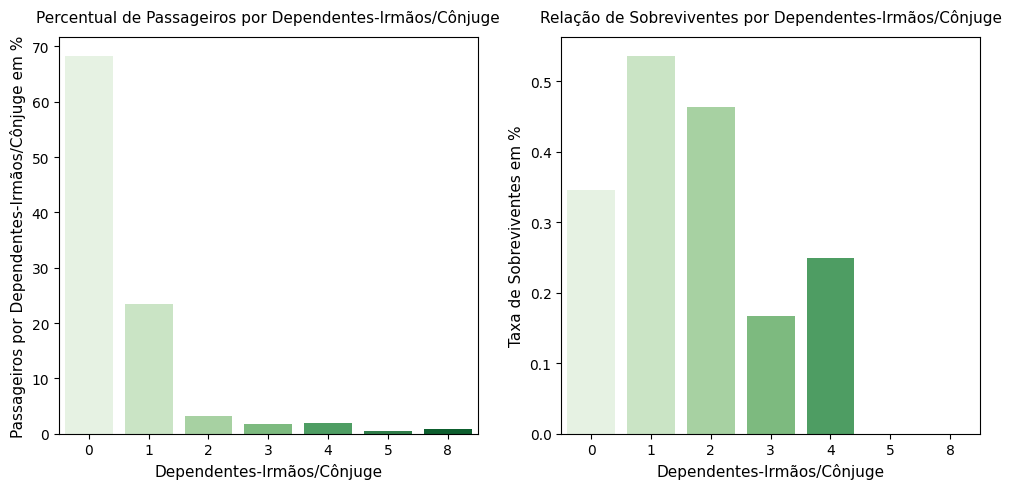

In [22]:
# Calcular o percentual de Passageiros a Bordo por Dependentes-Irmãos/Cônjuge (SibSp)
percentual_por_sibsp = df['SibSp'].value_counts(normalize=True) * 100

# Calcular o número de Sobreviventes por Dependentes-Irmãos/Cônjuge (SibSp) e a taxa de sobreviventes por essa categoria
sobreviventes_por_sibsp = df.groupby('SibSp')['Survived'].agg(['sum', 'mean'])
sobreviventes_por_sibsp.columns = ['Nº Sobreviventes por SibSp', 'Taxa de Sobrevivência por SibSp (%)']

# Criar DataFrame com as informações de Dependentes-Irmãos/Cônjuge (SibSp)
quant_sibsp = pd.DataFrame({
    'Dependentes-Irmãos/Cônjuge': percentual_por_sibsp.index,
    '% de passageiros por Dependentes-Irmãos/Cônjuge': percentual_por_sibsp.values,
    'Taxa de Sobreviventes por Dependentes-Irmãos/Cônjuge em %': sobreviventes_por_sibsp['Taxa de Sobrevivência por SibSp (%)']
})

# Ordenar o DataFrame pelos valores de SibSp
quant_sibsp = quant_sibsp.sort_values(by='Dependentes-Irmãos/Cônjuge')

# Criar os subplots
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

# Lista de cores para escolher
cores = ['Greys', 'Blues', 'Reds', 'Greens', 'Oranges', 'Purples']

# Gráfico: Percentual de Passageiros por Dependentes-Irmãos/Cônjuge
sns.barplot(x='Dependentes-Irmãos/Cônjuge', y='% de passageiros por Dependentes-Irmãos/Cônjuge', data=quant_sibsp,
            ax=axis1, palette=cores[3])
axis1.set_xlabel('Dependentes-Irmãos/Cônjuge', fontsize=11)
axis1.set_ylabel('Passageiros por Dependentes-Irmãos/Cônjuge em %', fontsize=11)
axis1.set_title('Percentual de Passageiros por Dependentes-Irmãos/Cônjuge', fontsize=11, pad=11)

# Gráfico: Relação de Sobreviventes por Dependentes-Irmãos/Cônjuge
sns.barplot(x='Dependentes-Irmãos/Cônjuge', y='Taxa de Sobreviventes por Dependentes-Irmãos/Cônjuge em %', data=quant_sibsp,
            ax=axis2, palette=cores[3])
axis2.set_xlabel('Dependentes-Irmãos/Cônjuge', fontsize=11)
axis2.set_ylabel('Taxa de Sobreviventes em %', fontsize=11)
axis2.set_title('Relação de Sobreviventes por Dependentes-Irmãos/Cônjuge', fontsize=11, pad=11)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)  # Ajuste a largura entre os subplots
plt.show()

In [23]:
def generate_parch_table(df):
    # Calcular o percentual de Passageiros a Bordo por Dependentes-Pais/Filhos (Parch)
    percentual_por_parch = df['Parch'].value_counts(normalize=True) * 100

    # Calcular o número de Sobreviventes por Dependentes-Pais/Filhos (Parch) e a taxa de sobreviventes por essa categoria
    sobreviventes_por_parch = df.groupby('Parch')['Survived'].agg(['sum', 'mean'])
    sobreviventes_por_parch.columns = ['Nº Sobreviventes por Parch', 'Taxa de Sobrevivência por Parch (%)']

    # Criar DataFrame com as informações de Dependentes-Pais/Filhos (Parch)
    quant_parch = pd.DataFrame({
        'Dependentes-Pais/Filhos': percentual_por_parch.index,
        '% de passageiros por Dependentes-Pais/Filhos': percentual_por_parch.values,
        'Nº Sobreviventes por Dependentes-Pais/Filhos': sobreviventes_por_parch['Nº Sobreviventes por Parch'],
        'Taxa de Sobreviventes por Dependentes-Pais/Filhos em %': sobreviventes_por_parch['Taxa de Sobrevivência por Parch (%)']
    })

    # Ordenar o DataFrame pelos valores de Parch
    quant_parch = quant_parch.sort_values(by='Dependentes-Pais/Filhos')

    # Exibir a tabela usando tabulate
    print(tabulate(quant_parch, headers='keys', tablefmt='fancy_grid', showindex=False, colalign=("center",)*len(quant_sibsp.columns)))

# Exemplo de uso
generate_parch_table(df)

╒═══════════════════════════╤════════════════════════════════════════════════╤════════════════════════════════════════════════╤══════════════════════════════════════════════════════════╕
│  Dependentes-Pais/Filhos  │  % de passageiros por Dependentes-Pais/Filhos  │  Nº Sobreviventes por Dependentes-Pais/Filhos  │   Taxa de Sobreviventes por Dependentes-Pais/Filhos em % │
╞═══════════════════════════╪════════════════════════════════════════════════╪════════════════════════════════════════════════╪══════════════════════════════════════════════════════════╡
│             0             │                    76.0943                     │                      233                       │                                                 0.343658 │
├───────────────────────────┼────────────────────────────────────────────────┼────────────────────────────────────────────────┼──────────────────────────────────────────────────────────┤
│             1             │                    13.2435         

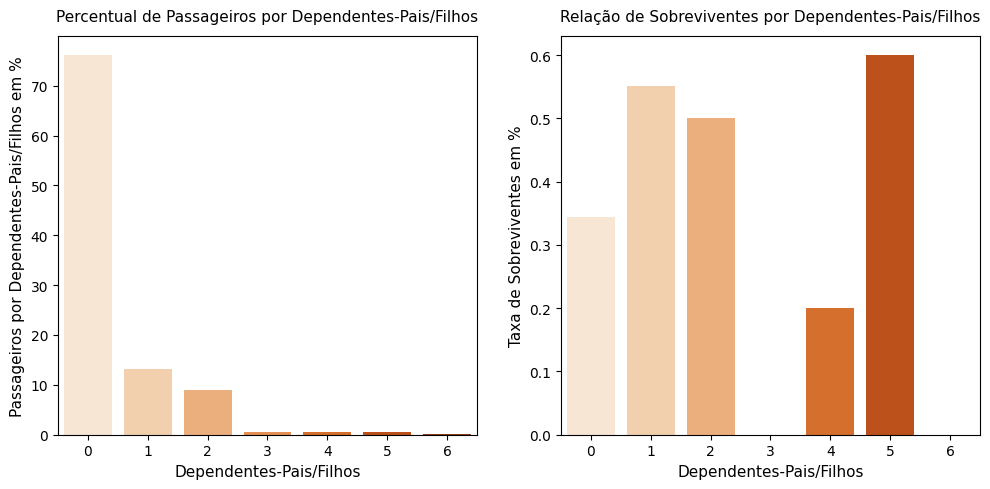

In [24]:
# Calcular o percentual de Passageiros a Bordo por Dependentes-Pais/Filhos (Parch)
percentual_por_parch = df['Parch'].value_counts(normalize=True) * 100

# Calcular o número de Sobreviventes por Dependentes-Pais/Filhos (Parch) e a taxa de sobreviventes por essa categoria
sobreviventes_por_parch = df.groupby('Parch')['Survived'].agg(['sum', 'mean'])
sobreviventes_por_parch.columns = ['Nº Sobreviventes por Parch', 'Taxa de Sobrevivência por Parch (%)']

# Criar DataFrame com as informações de Dependentes-Pais/Filhos (Parch)
quant_parch = pd.DataFrame({
    'Dependentes-Pais/Filhos': percentual_por_parch.index,
    '% de passageiros por Dependentes-Pais/Filhos': percentual_por_parch.values,
    'Taxa de Sobreviventes por Dependentes-Pais/Filhos em %': sobreviventes_por_parch['Taxa de Sobrevivência por Parch (%)']
})

# Ordenar o DataFrame pelos valores de Parch
quant_parch = quant_parch.sort_values(by='Dependentes-Pais/Filhos')

# Criar os subplots
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

# Lista de cores para escolher
cores = ['Greys', 'Blues', 'Reds', 'Greens', 'Oranges', 'Purples']

# Gráfico: Percentual de Passageiros por Dependentes-Pais/Filhos
sns.barplot(x='Dependentes-Pais/Filhos', y='% de passageiros por Dependentes-Pais/Filhos', data=quant_parch,
            ax=axis1, palette=cores[4])
axis1.set_xlabel('Dependentes-Pais/Filhos', fontsize=11)
axis1.set_ylabel('Passageiros por Dependentes-Pais/Filhos em %', fontsize=11)
axis1.set_title('Percentual de Passageiros por Dependentes-Pais/Filhos', fontsize=11, pad=11)

# Gráfico: Relação de Sobreviventes por Dependentes-Pais/Filhos
sns.barplot(x='Dependentes-Pais/Filhos', y='Taxa de Sobreviventes por Dependentes-Pais/Filhos em %', data=quant_parch,
            ax=axis2, palette=cores[4])
axis2.set_xlabel('Dependentes-Pais/Filhos', fontsize=11)
axis2.set_ylabel('Taxa de Sobreviventes em %', fontsize=11)
axis2.set_title('Relação de Sobreviventes por Dependentes-Pais/Filhos', fontsize=11, pad=11)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)  # Ajuste a largura entre os subplots
plt.show()

In [25]:
# Calcula as estatísticas descritivas
statistics = df.describe(include='all')

# Imprimir as estatísticas descritivas em uma tabela formatada
print("Estatísticas Descritivas:")
print(tabulate(statistics, headers='keys', tablefmt='fancy_grid', colalign=("right",)*len(df.columns)))

Estatísticas Descritivas:
╒════════╤═══════════════╤════════════╤══════════╤═════════════════════════╤═══════╤═════════╤══════════╤══════════╤══════════╤═════════╤═════════╤════════════╤════════════════╕
│        │   PassengerId │   Survived │   Pclass │                    Name │   Sex │     Age │    SibSp │    Parch │   Ticket │    Fare │   Cabin │   Embarked │ Faixa Etária   │
╞════════╪═══════════════╪════════════╪══════════╪═════════════════════════╪═══════╪═════════╪══════════╪══════════╪══════════╪═════════╪═════════╪════════════╪════════════════╡
│  count │           891 │        891 │      891 │                     891 │   891 │     891 │      891 │      891 │      891 │     891 │     204 │        889 │ 891            │
├────────┼───────────────┼────────────┼──────────┼─────────────────────────┼───────┼─────────┼──────────┼──────────┼──────────┼─────────┼─────────┼────────────┼────────────────┤
│ unique │           nan │        nan │      nan │                     891 │     2 │

In [26]:
# Calcular as taxas de sobrevivência
survival_rate_Sex = df.groupby('Sex')['Survived'].mean()
survival_rate_Pclass = df.groupby('Pclass')['Survived'].mean()
survival_rate_Age = df.groupby(pd.cut(df['Age'], bins=[0, 18, 30, 50, 100]))['Survived'].mean()
survival_rate_SibSp = df.groupby('SibSp')['Survived'].mean()
survival_rate_Parch = df.groupby('Parch')['Survived'].mean()

# Memória de Cálculo
print("Taxa de Sobrevivência por Sexo:")
print(tabulate(survival_rate_Sex.reset_index(), headers='keys', tablefmt='fancy_grid'))
print("\nTaxa de Sobrevivência por Classe Socioeconômica:")
print(tabulate(survival_rate_Pclass.reset_index(), headers='keys', tablefmt='fancy_grid'))
print("\nTaxa de Sobrevivência por Faixa Etária:")
print(tabulate(survival_rate_Age.reset_index(), headers='keys', tablefmt='fancy_grid'))
print("\nTaxa de Sobrevivência por Dependentes-Irmãos/Cônjuge:")
print(tabulate(survival_rate_SibSp.reset_index(), headers='keys', tablefmt='fancy_grid'))
print("Taxa de Sobrevivência por Dependentes-Pais/Filhos:")
print(tabulate(survival_rate_Parch.reset_index(), headers='keys', tablefmt='fancy_grid'))

# Fórmulas
print("\nFórmulas Utilizadas:")
print("Taxa de Sobrevivência por Sexo: (Número de Sobreviventes do Sexo / Número Total de Passageiros do Sexo)")
print("Taxa de Sobrevivência por Classe Socioeconômica: (Número de Sobreviventes da Classe / Número Total de Passageiros da Classe)")
print("Taxa de Sobrevivência por Faixa Etária: (Número de Sobreviventes na Faixa Etária / Número Total de Passageiros na Faixa Etária)")
print("Taxa de Sobrevivência por Faixa Etária: (Número de Sobreviventes de Dependentes-Irmãos/Cônjuge / Número Total de Passageiros Dependentes-Irmãos/Cônjuge)")
print("Taxa de Sobrevivência por Faixa Etária: (Número de Sobreviventes de Dependentes-Pais/Filhos / Número Total de Passageiros Dependentes-Pais/Filhos)")


Taxa de Sobrevivência por Sexo:
╒════╤════════╤════════════╕
│    │ Sex    │   Survived │
╞════╪════════╪════════════╡
│  0 │ female │   0.742038 │
├────┼────────┼────────────┤
│  1 │ male   │   0.188908 │
╘════╧════════╧════════════╛

Taxa de Sobrevivência por Classe Socioeconômica:
╒════╤══════════╤════════════╕
│    │   Pclass │   Survived │
╞════╪══════════╪════════════╡
│  0 │        1 │   0.62963  │
├────┼──────────┼────────────┤
│  1 │        2 │   0.472826 │
├────┼──────────┼────────────┤
│  2 │        3 │   0.242363 │
╘════╧══════════╧════════════╛

Taxa de Sobrevivência por Faixa Etária:
╒════╤═══════════╤════════════╕
│    │ Age       │   Survived │
╞════╪═══════════╪════════════╡
│  0 │ (0, 18]   │   0.503597 │
├────┼───────────┼────────────┤
│  1 │ (18, 30]  │   0.331096 │
├────┼───────────┼────────────┤
│  2 │ (30, 50]  │   0.423237 │
├────┼───────────┼────────────┤
│  3 │ (50, 100] │   0.34375  │
╘════╧═══════════╧════════════╛

Taxa de Sobrevivência por Dependentes-Irmã

<Figure size 400x200 with 0 Axes>

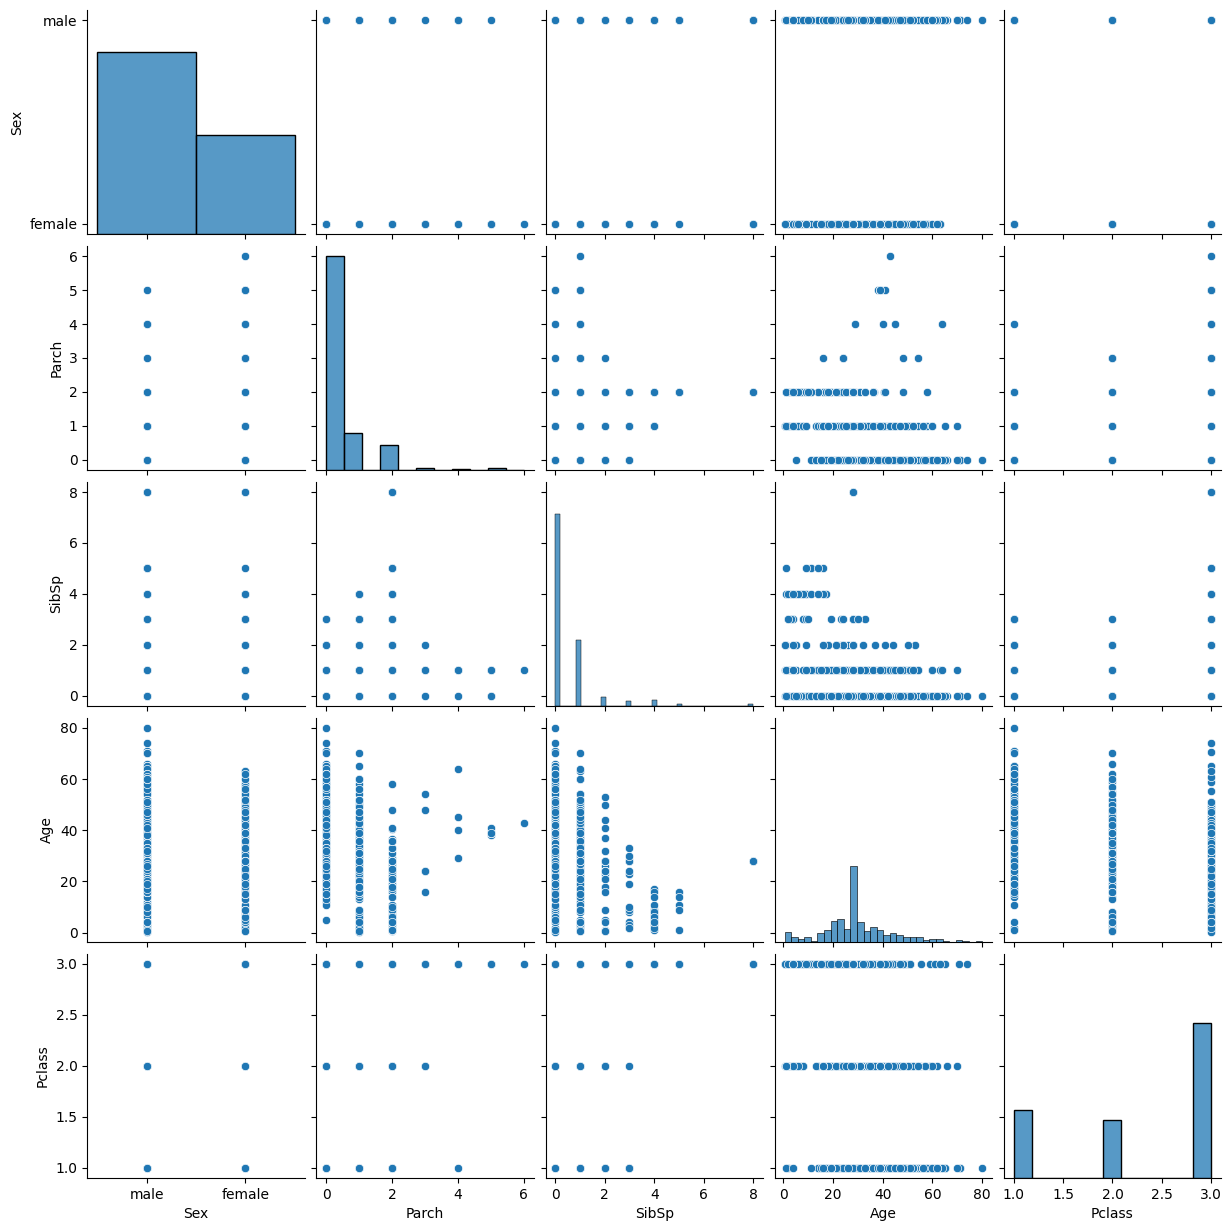

In [27]:
###### Convertendo infinitos para NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Matriz de dispersão
plt.figure(figsize=(4, 2))
sns.pairplot(df, x_vars=['Sex', 'Parch', 'SibSp', 'Age', 'Pclass'], y_vars=['Sex', 'Parch', 'SibSp', 'Age', 'Pclass'])

<Axes: >

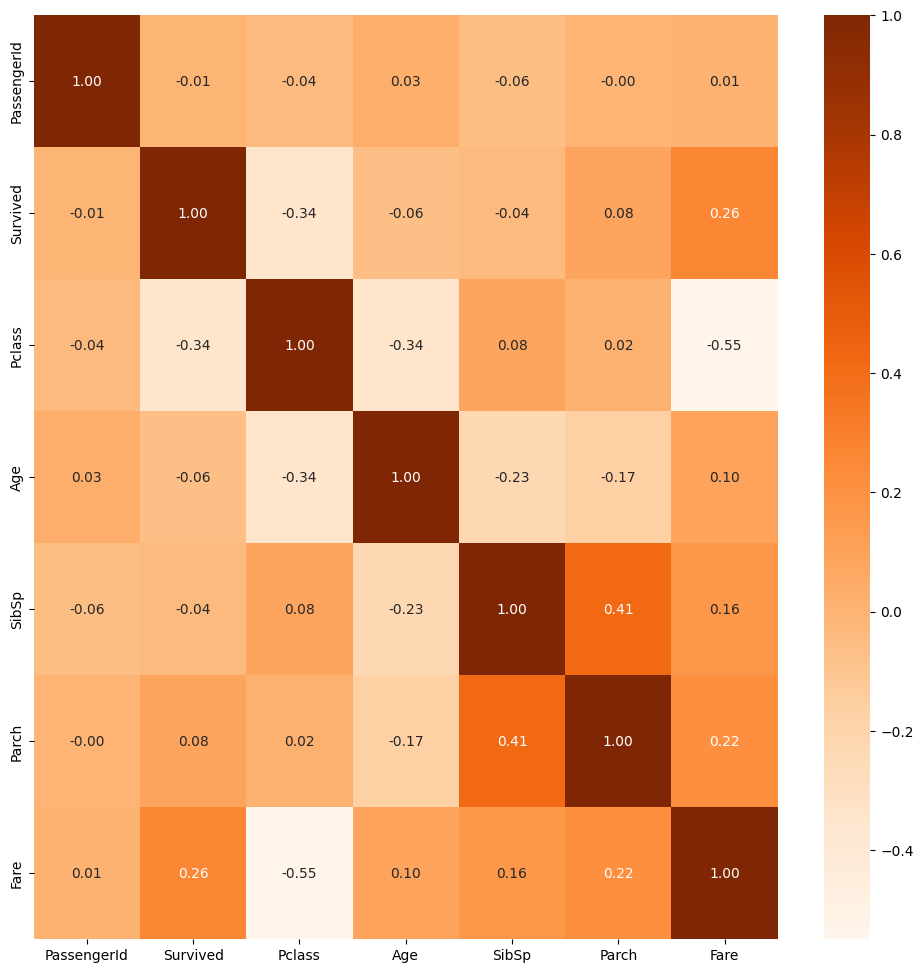

In [28]:
# matriz de correlação
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Oranges', fmt='.2f')

Este gráfico é uma matriz de correlação, que mostra as correlações entre diferentes variáveis do conjunto de dados do naufrágio do Titanic. Cada célula colorida representa o coeficiente de correlação entre duas variáveis específicas. As cores mais avermelhadas indicam correlação positiva, enquanto as cores mais alaranjadas/amareladas indicam correlação negativa.
 
Algumas observações importantes:
 
1. A variável "PassengerId" tem correlação próxima de 1 consigo mesma, o que é esperado, já que é um identificador único.
 
2. As variáveis "Survived" e "Pclass" mostram uma correlação negativa moderada, sugerindo que passageiros de classes mais altas tiveram maior probabilidade de sobrevivência.
 
3. "Age" mostra correlações negativas fracas com "Survived" e "Pclass", indicando que pessoas mais jovens tinham uma leve vantagem de sobrevivência e tendiam a estar em classes mais altas.
 
4. "Sibsp" (número de irmãos/cônjuges a bordo) tem uma correlação positiva fraca com "Parch" (número de pais/filhos a bordo), sugerindo que famílias maiores viajavam juntas.
 
5. "Fare" tem uma correlação positiva moderada com "Pclass", o que faz sentido, já que passageiros de classes mais altas pagavam tarifas mais altas.
 
Em resumo, este gráfico de correlações pode fornecer insights iniciais sobre os relacionamentos entre as variáveis do conjunto de dados do Titanic e orientar uma análise mais aprofundada.

**Pré-processamento e Tratamento dos Dados**

**Sobreviventes por idade**

In [29]:
pd.DataFrame(df.Age.describe())

,Age
count,891.000000
mean,29.361582
std,13.019697
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [30]:
# Avaliando a existência de dados nulos
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
Faixa Etária      0
dtype: int64

In [31]:
df.Age.isna().sum() 

0

In [32]:
#df = df.dropna() #eliminando e verificando os dados faltantes
#df.Age.isna().sum() #Verificando após eliminação

In [33]:
pd.DataFrame(df.Age.describe())

,Age
count,891.000000
mean,29.361582
std,13.019697
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [34]:
df = df.copy()
df.Age.fillna(df.Age.median(), inplace=True)  #preenchendo os dados faltantes com a mediana.
df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
# Exclusão de dados por não terem importância em nossa pesquisa
#df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Fare'], inplace=True)
#df.head()

**Tratando os valores faltantes**